In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim



# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import pickle

Using TensorFlow backend.


In [2]:
%run custom_functions.ipynb

In [3]:
# df=pd.read_csv('train-file.csv')
# df = df.sample(frac=1).reset_index(drop=True)
# # df.to_csv('train-reshuffled.csv')

df=pd.read_csv('data/train-reshuffled.csv')

df.head(10)

,id,label,tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...
3,18283,1,@user you might be a libtard if... #libtard #...
4,25845,0,what are your goals? find out here... #smile...
5,14297,0,retweets @user #nuascannan
6,14016,0,a classic trump follower.
7,7009,0,"in the mixture of emotions, here's a one fro..."
8,18926,0,@user the meps bear that travelled to sandy ho...
9,28292,0,just because it affected her son? sonâs ab...


In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [7]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")


In [8]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [9]:
df['tidy_tweet']= df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split()]))

In [10]:
df['no_hash_tweet']= df['tidy_tweet'].str.replace("#", "")

In [11]:
df['tokenized_tweet'] = df['no_hash_tweet'].apply(lambda x: x.split())
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre..."
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a..."
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb..."
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,..."
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]"


In [12]:
stemmer = SnowballStemmer("english")
df['stemmed_tokens'] = df.tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
df.head()


,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ..."
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a..."
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb..."
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,..."
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]"


In [13]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df.tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # lemmatizing
# [lemmatizer.lemmatize(word) for word in df.no_hash_tweet]
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ..."
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a..."
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb..."
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,..."
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]"


In [14]:
df.stemmed_tokens[0][0]

'sad'

In [15]:
df['lem_tweet'] = [lemmatizer.lemmatize(word) for word in df.no_hash_tweet]

In [16]:
df['stem_tweet'] = [stemmer.stem(word) for word in df.no_hash_tweet]

In [17]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


In [18]:
df.label.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [19]:
df_0=df[df['label']==0]
df_0.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil
5,14297,0,retweets @user #nuascannan,retweets #nuascannan,retweets nuascannan,"[retweets, nuascannan]","[retweet, nuascannan]","[retweets, nuascannan]",retweets nuascannan,retweets nuascannan


In [20]:
df_1= df[df['label']==1]
df_1.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
22,18207,1,rise up today is out! stories of police bruta...,rise up today is out stories of police brutali...,rise up today is out stories of police brutali...,"[rise, up, today, is, out, stories, of, police...","[rise, up, today, is, out, stori, of, polic, b...","[rise, up, today, is, out, story, of, police, ...",rise up today is out stories of police brutali...,rise up today is out stories of police brutali...
33,20139,1,@user ouch woow! @user @user #sexy @user @user...,ouch woow #sexy,ouch woow sexy,"[ouch, woow, sexy]","[ouch, woow, sexi]","[ouch, woow, sexy]",ouch woow sexy,ouch woow sexi
37,14894,1,"""vandals turned a jewish family's menorah into...",vandals turned a jewish family s menorah into ...,vandals turned a jewish family s menorah into ...,"[vandals, turned, a, jewish, family, s, menora...","[vandal, turn, a, jewish, famili, s, menorah, ...","[vandal, turned, a, jewish, family, s, menorah...",vandals turned a jewish family s menorah into ...,vandals turned a jewish family s menorah into ...
44,24776,1,"""the reality is that the tech industry is made...",the reality is that the tech industry is made ...,the reality is that the tech industry is made ...,"[the, reality, is, that, the, tech, industry, ...","[the, realiti, is, that, the, tech, industri, ...","[the, reality, is, that, the, tech, industry, ...",the reality is that the tech industry is made ...,the reality is that the tech industry is made ...


In [21]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


In [22]:
with open('data/cleaned-reshuffled.pkl', 'wb') as f:
	pickle.dump(df, f)

## Data Visualization

In [26]:
# from PIL import Image
# cloud_mask = np.array(Image.open("twitter.png"))
# cloud_mask

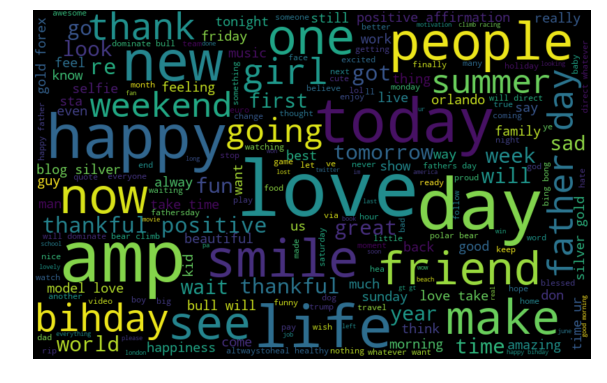

In [27]:
from wordcloud import WordCloud

df_0_words = ' '.join([text for text in df['tidy_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=10, max_font_size=110).generate(df_0_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

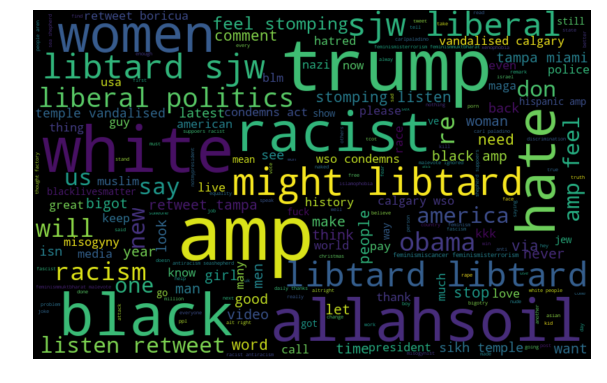

In [29]:
df_1_words = ' '.join([text for text in df['tidy_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=210, max_font_size=110).generate(df_1_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
# function to collect hashtags
def hashtag_extract(tweet):
    hashtags = []
    # Loop over the words in the tweet
    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtags.append(ht)

    return hashtags

In [32]:
# extracting hashtags from non racist/sexist tweets
HT_0 = hashtag_extract(df['tidy_tweet_2'][df['label']==0])

# extracting hashtags from racist/sexist tweets
HT_1 = hashtag_extract(df['tidy_tweet_2'][df['label']==1])


KeyError: 'tidy_tweet_2'

In [ ]:
HT_0

In [ ]:
# unnesting lists
HT_0 = sum(HT_0,[])
HT_1 = sum(HT_1,[])

In [ ]:
HT_0

In [ ]:
a = nltk.FreqDist(HT_0)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
b = nltk.FreqDist(HT_1)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
meta_freqdist = FreqDist(HT_1)
meta_freqdist.most_common(10)

In [ ]:
meta_freqdist.plot(10,cumulative=False)

In [ ]:
meta_freqdist = FreqDist(HT_0)
meta_freqdist.most_common(10)

In [ ]:
meta_freqdist.plot(10,cumulative=False)

## Bigram

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
meta_finder = BigramCollocationFinder.from_words(df['no_hash_tweet'])


In [ ]:
bigram_scored = meta_finder.score_ngrams(bigram_measures.raw_freq)


In [ ]:
bigram_scored